In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.offline as pyo
import plotly.graph_objs as go
import plotly.graph_objects as go
# Set notebook mode to work in offline
pyo.init_notebook_mode()
import plotly.express as px
from plotly.subplots import make_subplots

import re

from wordcloud import WordCloud, STOPWORDS

In [63]:
FILE = 'input_data.xlsx'

X0 = 'Final Data'
X1 = 'Short description'
X2 = 'Description'
X3 = 'Caller'
Y = 'Assignment group'

X4 = 'Word Count'

In [3]:
data = pd.read_excel(FILE, engine='openpyxl')
data.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2  _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group  
0            GRP_0  
1            GRP_0  
2            GRP_0  
3            GRP_0  
4            GRP_0

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Caller             8500 non-null   object
 3   Assignment group   8500 non-null   object
dtypes: object(4)
memory usage: 265.8+ KB


## Working with duplication of data, row wise as well as column wise

### Row wise duplication
Find all duplicate checking with X1, X2 and Y have same.

In [5]:
duplicate = data[data.duplicated([X1, X2, Y])]

In [6]:
data.drop(duplicate.index, inplace=True)

There are still data where X1 and X2 are same but target variable Y is different. Need to see what needs to be done for that. There are 16 such rows which has X1 and X2 same but Y different

In [51]:
confused = data[data.duplicated([X1, X2])]

In [57]:
def get_potential_wrong_labelled_data(short_desc):
    if str(confused[X1]).find(str(short_desc)) != -1:
        return True
    return False

potential_wrong_data = data[data.apply(lambda x: get_potential_wrong_labelled_data(x[X1]), axis=1)]

In [60]:
potential_wrong_data.sort_values([X1, X2])

index                            Short description  \
7026   7552                               account locked   
1454   1526                               account locked   
3337   3524                               account locked   
408     423                              account locked.   
2910   3075                              account locked.   
7288   7828                              account locked.   
7284   7824                              account locked.   
1244   1300  cannot review stock at mdw04 // mm 6720004    
1245   1301  cannot review stock at mdw04 // mm 6720004    
2380   2513                                       ethics   
4316   4593                                       ethics   
1508   1582                       no power on the laptop   
1628   1708                       no power on the laptop   
1         1                                      outlook   
2109   2219                                      outlook   
7228   7764                                      problem   
1769   1860                                            s   
539     559                            uacyltoe hxgaycze   
1944   2045                            uacyltoe hxgaycze   
1966   2070                            uacyltoe hxgaycze   
2083   2192                            uacyltoe hxgaycze   
22       22                     unable to connect to vpn   
177     181                     unable to connect to vpn   
5587   5985                     unable to connect to vpn   
4457   4751                     unable to connect to vpn   
858     894                     unable to launch outlook   
2890   3052                     unable to launch outlook   
1450   1521                    unable to login to ethics   
7770   8353                    unable to login to ethics   
3917   4162                    unable to login to ethics   
4558   4858                                          vpn   
5763   6174                                          vpn   
4336   4614                                          vpn   
1756   1846                                          vpn   

                                            Description             Caller  \
7026  _x000D_\n_x000D_\nreceived from: vhlepcta.lqbg...  vhlepcta lqbgcxpt   
1454                                     account locked  vgzmjkop rgeubdco   
3337  ic\n welcome, our next available agent will be...  bnoupaki cpeioxdz   
408                                     account locked.  bkyphsgq cfyksehu   
2910                                    account locked.  sygionua szunhced   
7288                                    account locked.  ydigzqbu xdgjizek   
7284                            account locked_x000D_\n  tfnzwycd bicohjga   
1244  _x000D_\n_x000D_\nreceived from: aqrhwjgo.cyel...  aqrhwjgo cyelqkvs   
1245  _x000D_\n_x000D_\nreceived from: aqrhwjgo.cyel...  aqrhwjgo cyelqkvs   
2380  \n\nreceived from: soujqrxw.mvwduljx@gmail.com...  soujqrxw mvwduljx   
4316  _x000D_\n_x000D_\nreceived from: gasbfqvp.fmvq...  gasbfqvp fmvqgjih   
1508                             no power on the laptop  vgtpkjhn flwsytik   
1628                             no power on the laptop  khrflgcj zxojidhe   
1     _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2109  _x000D_\nuser got  crm and outlook configured ...  jvpkulxw ovuweygj   
7228  \n\nreceived from: vkzwafuh.tcjnuswg@gmail.com...  vkzwafuh tcjnuswg   
1769                                                  s  gzjtweph mnslwfqv   
539   name:tqnbkjgu xyedbsnm\nlanguage:\nbrowser:mic...  tqnbkjgu xyedbsnm   
1944                                  uacyltoe hxgaycze  xweclugf qmhbjsyi   
1966                                  uacyltoe hxgaycze  rxoluzhy pnutohms   
2083                                  uacyltoe hxgaycze  fdmaluyo tvecikxn   
22                             unable to connect to vpn  pfmcnahv ofzlusri   
177                            unable to connect to vpn  aljbtwsh lepkbgix   
5587                           un

In [61]:
potential_wrong_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34 entries, 7026 to 1756
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              34 non-null     int64 
 1   Short description  34 non-null     object
 2   Description        34 non-null     object
 3   Caller             34 non-null     object
 4   Assignment group   34 non-null     object
 5   Final Data         34 non-null     object
dtypes: int64(1), object(5)
memory usage: 1.9+ KB


### Column wise duplication

This is required to check and as ultimately we are going to merge both of the columns in the end before feeding to model for training. This will help in removing unecessary redundancy of data which impacts the outcome. There are 3592 such rows

In [8]:
redundant_desc = data[data.apply(lambda x: str(x[X2]).find(str(x[X1])) != -1, axis=1)]
redundant_desc

Short description  \
1                                               outlook   
3                         unable to access hr_tool page   
4                                          skype error    
5        unable to log in to engineering tool and skype   
7     ticket_no1550391- employment status - new non-...   
...                                                 ...   
8492                 hr_tool etime option not visitble    
8494  tablet needs reimaged due to multiple issues w...   
8496                           telephony_software issue   
8497  vip2: windows password reset for tifpdchb pedx...   
8499  an mehreren pc`s lassen sich verschiedene prgr...   

                                            Description             Caller  \
1     _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
3                         unable to access hr_tool page  xbkucsvz gcpydteq   
4                                          skype error   owlgqjme qhcozdfx   
5        unable to log in to engineering tool and skype  eflahbxn ltdgrvkz   
7     ticket_no1550391- employment status - new non-...  eqzibjhw ymebpoih   
...                                                 ...                ...   
8492                 hr_tool etime option not visitble   tmopbken ibzougsd   
8494  tablet needs reimaged due to multiple issues w...  cpmaidhj elbaqmtp   
8496                           telephony_software issue  rbozivdq gmlhrtvp   
8497  vip2: windows password reset for tifpdchb pedx...  oybwdsgx oxyhwrfz   
8499  an mehreren pc`s lassen sich verschiedene prgr...  kqvbrspl jyzoklfx   

     Assignment group  
1               GRP_0  
3               GRP_0  
4               GRP_0  
5               GRP_0  
7               GRP_0  
...               ...  
8492            GRP_0  
8494            GRP_3  
8496            GRP_0  
8497            GRP_0  
8499           GRP_49  

[3592 rows x 4 columns]

In [9]:
def merge_data(short_desc, long_desc):
    if str(long_desc).find(str(short_desc)) != -1:
        return str(long_desc).lower()
    else:
        return (str(short_desc) + " " + str(long_desc)).lower()


data[X0] = data.apply(lambda x: merge_data(x[X1], x[X2]), axis=1)
data.head()

Short description  \
0                    login issue   
1                        outlook   
2             cant log in to vpn   
3  unable to access hr_tool page   
4                   skype error    

                                         Description             Caller  \
0  -verified user details.(employee# & manager na...  spxjnwir pjlcoqds   
1  _x000D_\n_x000D_\nreceived from: hmjdrvpb.komu...  hmjdrvpb komuaywn   
2  _x000D_\n_x000D_\nreceived from: eylqgodm.ybqk...  eylqgodm ybqkwiam   
3                      unable to access hr_tool page  xbkucsvz gcpydteq   
4                                       skype error   owlgqjme qhcozdfx   

  Assignment group                                         Final Data  
0            GRP_0  login issue -verified user details.(employee# ...  
1            GRP_0  _x000d_\n_x000d_\nreceived from: hmjdrvpb.komu...  
2            GRP_0  cant log in to vpn _x000d_\n_x000d_\nreceived ...  
3            GRP_0                      unable to access hr_tool page  
4            GRP_0                                       skype error

In [10]:
data.isna().sum()

Short description    5
Description          1
Caller               0
Assignment group     0
Final Data           0
dtype: int64

Since we don't have any null in final data, it is not required to eliminate any rows completely.

In [127]:
data.reset_index(inplace=True)

## Add count of words

This is required to analyse what should be the length our model should take to understand it's group

In [115]:
data[X4] = data[X0].str.split(" ").apply(lambda x: len(x))

In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7909 entries, 0 to 7908
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   index              7909 non-null   int64 
 1   Short description  7904 non-null   object
 2   Description        7908 non-null   object
 3   Caller             7909 non-null   object
 4   Assignment group   7909 non-null   object
 5   Final Data         7909 non-null   object
 6   Word Count         7909 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 432.6+ KB


## Target column analysis

Need to find how many classifications are there in the data since we are going to classify into this classes.

* Requires to check biasness in data provided, this will help in finding the approach on how to move forward

In [117]:
data[Y].unique()

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

In [118]:
agg_data = data.groupby(Y).size().reset_index(name = 'count')
fig = px.pie(agg_data, values='count', names=Y, title='Ticket Assignment')
fig.show()

In [119]:
fig = px.pie(agg_data[agg_data[Y]!='GRP_0'], values='count', names=Y, title='Ticket Assignment non GRP_0')
fig.show()

We have in total 74 groups in 7909 rows of data, and out of that 43% of data is just assigned to *GRP_0* which is clearly biased towards it. Few of the groups are so negligible that don't even have more than 10 of such rows. It would be better to split data into data with only *GRP_0* and *non-GRP_0* to make analysis much more precise

In [18]:
# def  clean_text(df, text_field, new_text_field_name):
#     df[new_text_field_name] = df[text_field].str.lower()
#     df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", elem))  
#     # remove numbers
#     df[new_text_field_name] = df[new_text_field_name].apply(lambda elem: re.sub(r"\d+", "", elem))
#     return df

In [120]:
data_non_0 = data[data[Y] != 'GRP_0']
data_0 = data[data[Y] == 'GRP_0']

In [121]:
fig = make_subplots(rows=3, cols=1)
fig.add_trace(go.Box(x=data[X4], quartilemethod='exclusive', name='Desc All'), row=1, col=1)
fig.add_trace(go.Box(x=data_0[X4], quartilemethod='exclusive', name='Desc GRP0'), row=2, col=1)
fig.add_trace(go.Box(x=data_non_0[X4], quartilemethod='exclusive', name='Desc Non GRP0'), row=3, col=1)

fig.update_traces(showlegend=False)
fig.update_layout({
    'width':1024,
    'height':600,
    'title':'Short Description total words'
})
fig.show()

In [122]:
data.describe().T

count         mean          std  min     25%     50%     75%  \
index       7909.0  4220.257555  2464.185439  0.0  2081.0  4204.0  6358.0   
Word Count  7909.0    34.939436    73.116389  1.0     8.0    20.0    33.0   

               max  
index       8499.0  
Word Count  1431.0

In [123]:
data_0.describe().T

count         mean          std  min     25%     50%     75%  \
index       3429.0  4127.175270  2495.988356  0.0  1975.0  4108.0  6297.0   
Word Count  3429.0    21.928551    31.698880  1.0     6.0    12.0    28.0   

               max  
index       8497.0  
Word Count   478.0

In [124]:
data_non_0.describe().T

count         mean          std  min      25%     50%      75%  \
index       4480.0  4291.502902  2437.441908  6.0  2178.75  4279.5  6404.25   
Word Count  4480.0    44.897991    91.874542  1.0    12.00    20.0    40.00   

               max  
index       8499.0  
Word Count  1431.0

From above **boxplot** *&* **description** it is clear that data from the group **GRP_0** has word count much less than any other group. This will be improved or some data loss will be there when gibberish data is cleansed from the given data

In [126]:
data[data[X4] <= 5]

index                       Short description  \
3         3           unable to access hr_tool page   
4         4                            skype error    
9         9         ticket update on inplant_874773   
14       14                unable to open payslips    
15       15         ticket update on inplant_874743   
...     ...                                     ...   
7884   8474  inquiry about employee- shesyhur posrt   
7885   8475    etime- time card update information.   
7892   8482          robot HostName_776 is inactive   
7896   8486       ticket update on ticket_no0427635   
7905   8496                telephony_software issue   

                                 Description             Caller  \
3              unable to access hr_tool page  xbkucsvz gcpydteq   
4                               skype error   owlgqjme qhcozdfx   
9            ticket update on inplant_874773  fumkcsji sarmtlhy   
14                  unable to open payslips   epwyvjsz najukwho   
15           ticket update on inplant_874743  fumkcsji sarmtlhy   
...                                      ...                ...   
7884  inquiry about employee- shesyhur posrt  pvlxjizg xzvlwqjc   
7885    etime- time card update information.  tmopbken ibzougsd   
7892          robot HostName_776 is inactive  rkupnshb gsmzfojw   
7896       ticket update on ticket_no0427635  fumkcsji sarmtlhy   
7905                telephony_software issue  rbozivdq gmlhrtvp   

     Assignment group                              Final Data  Word Count  
3               GRP_0           unable to access hr_tool page           5  
4               GRP_0                            skype error            3  
9               GRP_0         ticket update on inplant_874773           4  
14              GRP_0                unable to open payslips            5  
15              GRP_0         ticket update on inplant_874743           4  
...               ...                                     ...         ...  
7884            GRP_0  inquiry about employee- shesyhur posrt           5  
7885            GRP_0    etime- time card update information.           5  
7892            GRP_8          robot hostname_776 is inactive           4  
7896            GRP_0       ticket update on ticket_no0427635           4  
7905            GRP_0                telephony_software issue           2  

[1158 rows x 7 columns]

In [86]:
cloud = WordCloud(random_state=1, collocations=False)

In [89]:
def plot_cloud(wordcloud_data):
    wordcloud = cloud.generate(wordcloud_data)
    # Set figure size
    plt.figure(figsize=(30, 20))
    # Display image
    plt.imshow(wordcloud, interpolation='bilinear') 
    # No axis details
    plt.axis("off")
    plt.show()

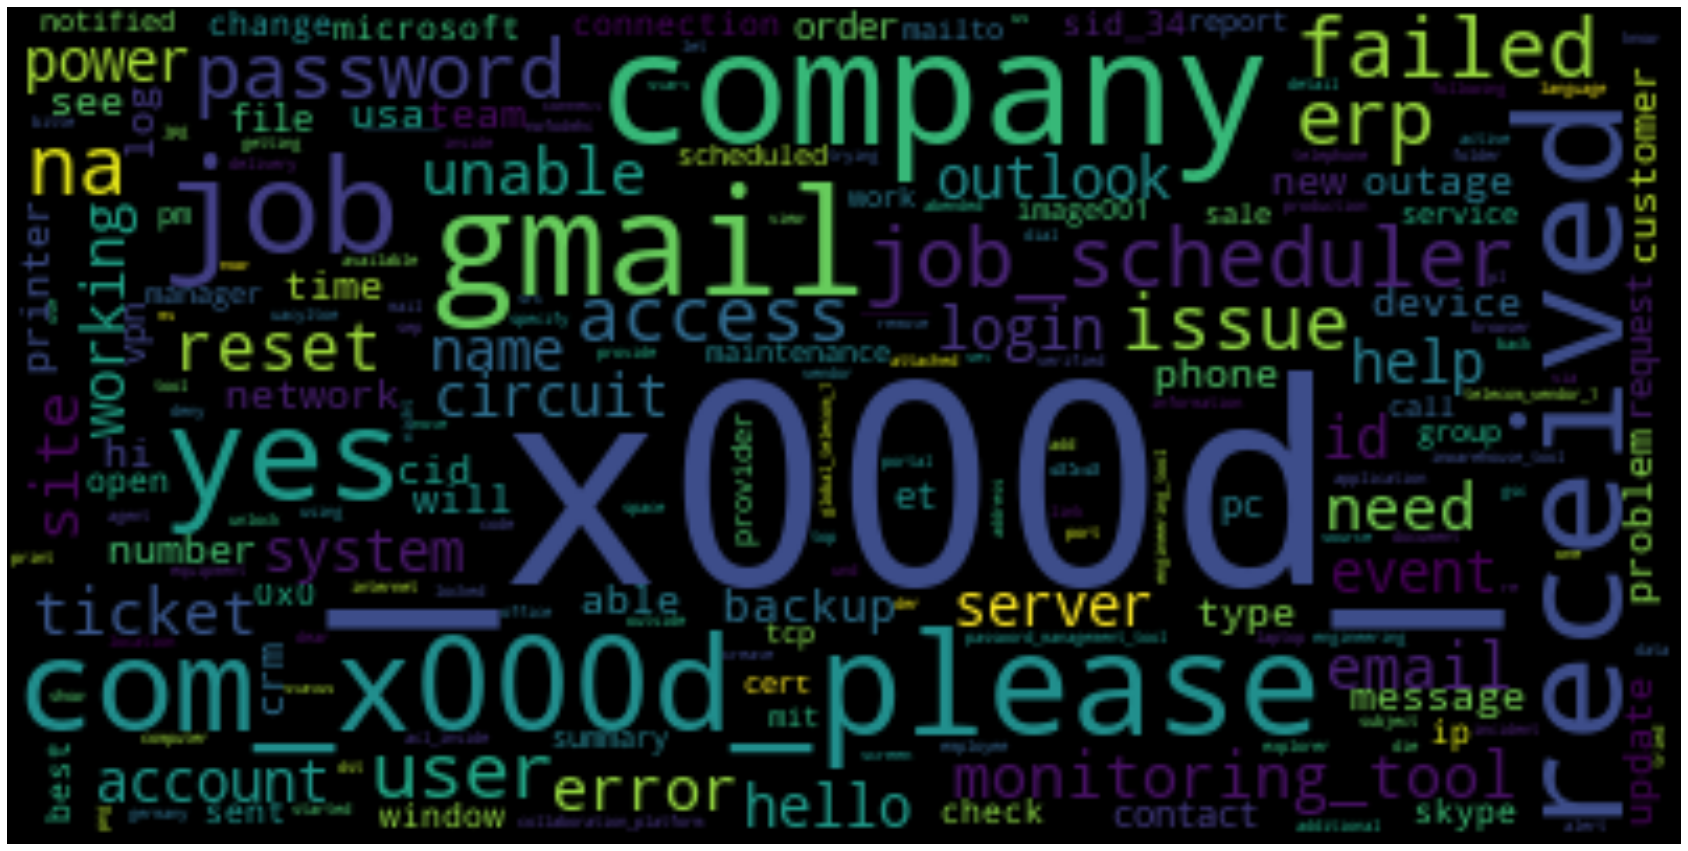

In [91]:
plot_cloud(' '.join(data[X0]))

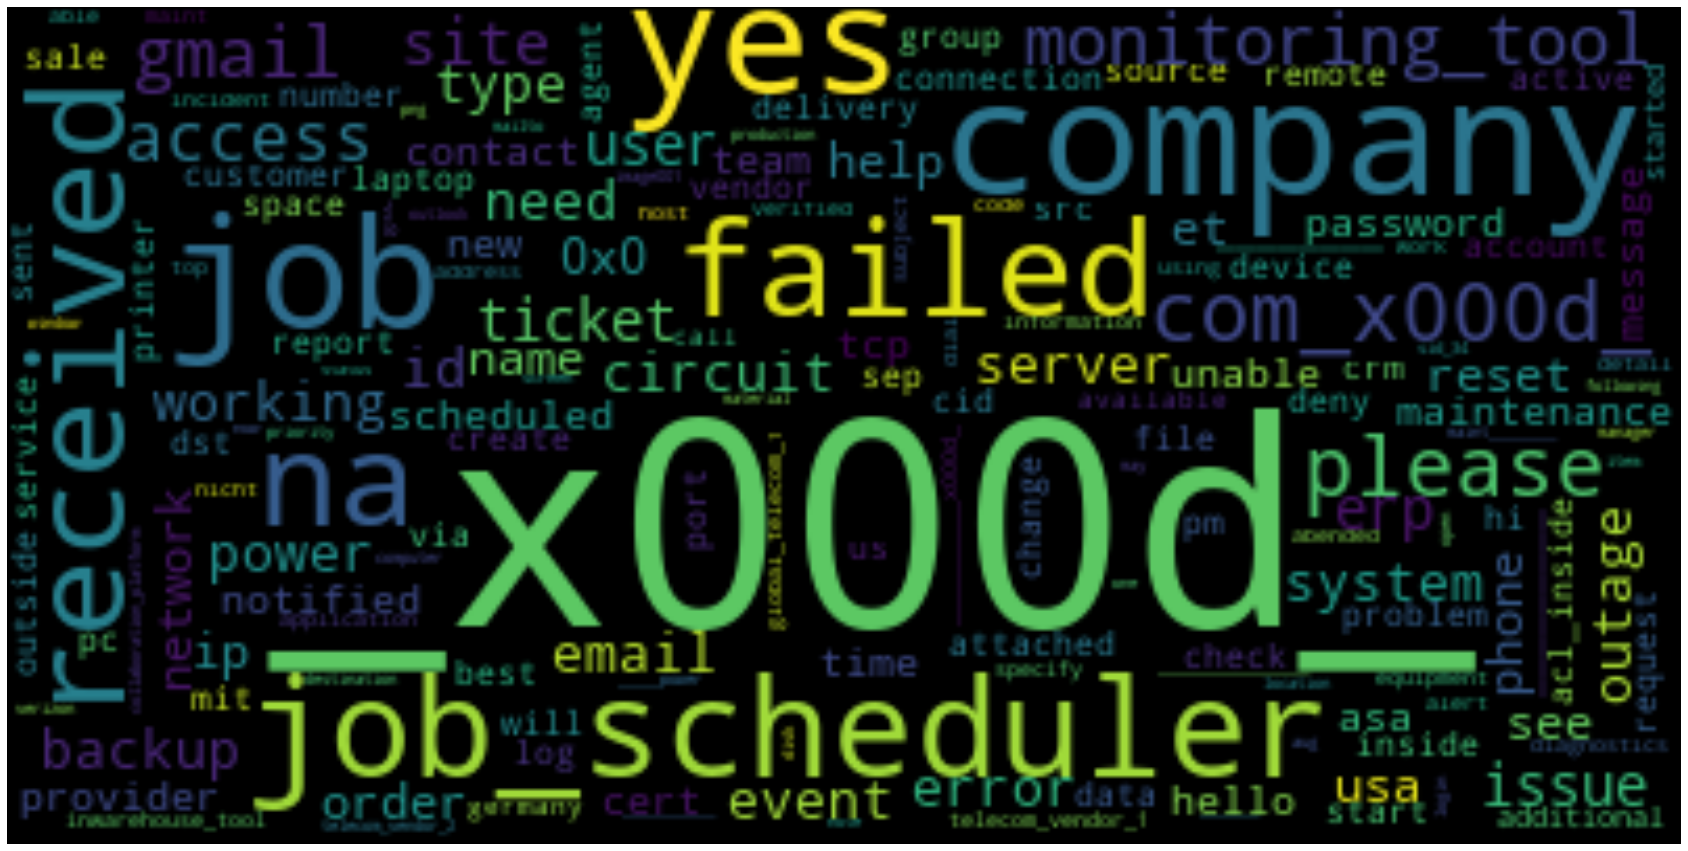

In [90]:
plot_cloud(' '.join(data_non_0[X0]))

All these word clouds are useful to detect some pattern of data having words like ***\_x000d\_*** needs to be removed. Word clouds can be used again and again to detect such data to clean data.